In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 第一步：读取数据
df = pd.read_csv('cat.csv',header = 0,index_col = 0)
df.head()
data=df['Bobcats']

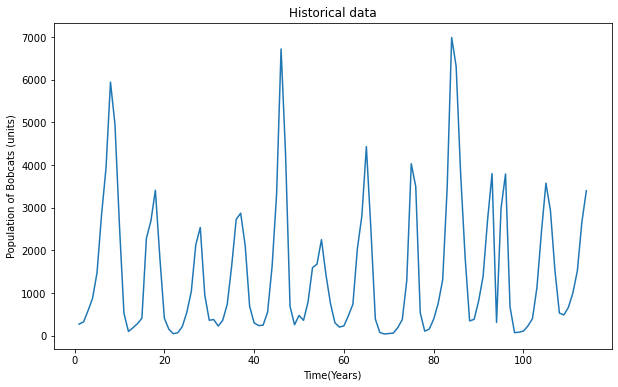

In [51]:
plt.figure(figsize = (10, 6))
plt.plot(df.index, data)
plt.xlabel('Time(Years)')
plt.ylabel('Population of Bobcats (units)')
plt.title("Historical data")
plt.savefig('hist.pdf')
plt.show() 

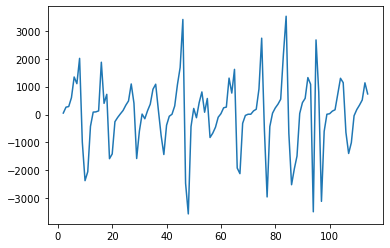

In [13]:
data_diff = data.diff()
data_diff = data_diff.dropna()
plt.plot(data_diff)
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_diff)


(-8.539141670071592,
 9.891632921677726e-14,
 7,
 105,
 {'1%': -3.4942202045135513,
  '5%': -2.889485291005291,
  '10%': -2.5816762131519275},
 1650.420587467904)

In [15]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(data_diff, lags = 20)

/Users/ericchang/.conda/envs/mcm1/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([  9.10949421,  13.89795224,  18.25337634,  26.32641252,
         34.03340063,  39.21023199,  42.79471892,  44.8568627 ,
         63.50652804,  76.24703347,  78.55845506,  78.766226  ,
         83.52526172,  88.62684685,  92.85612447,  98.28079889,
         99.02443354, 100.89733426, 112.97454236, 126.88888882]),
 array([2.54286175e-03, 9.59617183e-04, 3.89968957e-04, 2.71927880e-05,
        2.34482571e-06, 6.50950758e-07, 3.65430210e-07, 3.91713719e-07,
        2.81385527e-10, 2.71935475e-12, 2.80188268e-12, 7.09157281e-12,
        2.38481065e-12, 6.89150888e-13, 2.89947156e-13, 7.26698294e-14,
        1.34851588e-13, 1.51656024e-13, 2.24985206e-15, 1.49067619e-17]))

/var/folders/hn/vr0011xd2q522gjqfw13j0f40000gn/T/ipykernel_31810/3880943771.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()
/var/folders/hn/vr0011xd2q522gjqfw13j0f40000gn/T/ipykernel_31810/3880943771.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


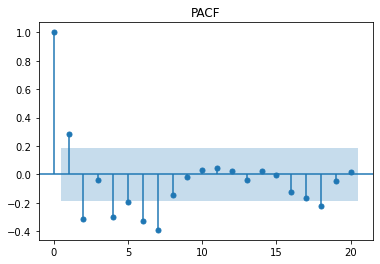

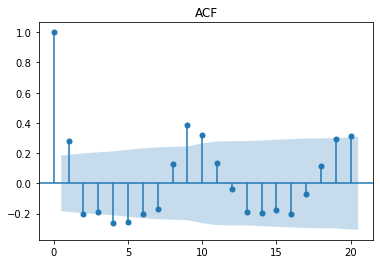

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(data_diff, lags=20)
plt.title('PACF')
pacf.show()

acf = plot_acf(data_diff, lags=20)
plt.title('ACF')
acf.show()


In [18]:
import statsmodels.tsa.stattools as st
model = st.arma_order_select_ic(data_diff, max_ar=5, max_ma=5, ic=['aic', 'bic', 'hqic'])
model.bic_min_order #返回一个元组，分别为p值和q值


/Users/ericchang/.conda/envs/mcm1/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/ericchang/.conda/envs/mcm1/lib/python3.9/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:218: RuntimeWarning: divide by zero encou

(2, 4)

In [81]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(1,1,1))
result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48995D+00    |proj g|=  7.67031D-04

At iterate    5    f=  8.48558D+00    |proj g|=  5.25802D-05
  ys=-2.597E-13  -gs= 3.934E-13 BFGS update SKIPPED

At iterate   10    f=  8.48558D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     18      1     1     0   0.000D+00   8.486D+00
  F =   8.4855827967541195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/ericchang/.conda/envs/mcm1/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/ericchang/.conda/envs/mcm1/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was pro

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Bobcats   No. Observations:                  113
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -958.871
Method:                       css-mle   S.D. of innovations           1156.470
Date:                Sat, 18 Dec 2021   AIC                           1925.742
Time:                        23:52:06   BIC                           1936.651
Sample:                             1   HQIC                          1930.169
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.2387     10.258      0.511      0.610     -14.867      25.344
ar.L1.D.Bobcats     0.6965      0.070      9.931      0.000       0.559       0.834
ma.L1.D.Bobcats    -1.0000      0.022    -45.052      0.000      -1.044      -0.956
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4358           +0.0000j            1.4358            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

/Users/ericchang/.conda/envs/mcm1/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


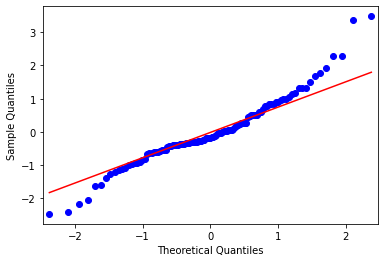

1.2830184889404568


In [54]:
resid = result.resid
from statsmodels.graphics.api import qqplot
qqplot(resid, line='q', fit=True)
plt.show()

import statsmodels.api as sm
print(sm.stats.durbin_watson(resid.values))


In [84]:
pred = result.predict(start=1, end =len(data) + 10 ) # 从训练集第0个开始预测(start=1表示从第0个开始)，预测完整个训练集后，还需要向后预测10个
print(len(pred))
print(pred[-10:])

124
114   -333.591257
115   -230.753905
116   -159.128439
117   -109.241825
118    -74.496161
119    -50.296059
120    -33.440865
121    -21.701345
122    -13.524855
123     -7.829989
dtype: float64


/Users/ericchang/.conda/envs/mcm1/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [86]:
result_fina = np.array(pred[0:-10]) + (np.array(data.shift(1)))
data.shift(1)

Year
1         NaN
2       269.0
3       321.0
4       585.0
5       871.0
        ...  
110     485.0
111     662.0
112    1000.0
113    1520.0
114    2657.0
Name: Bobcats, Length: 114, dtype: float64

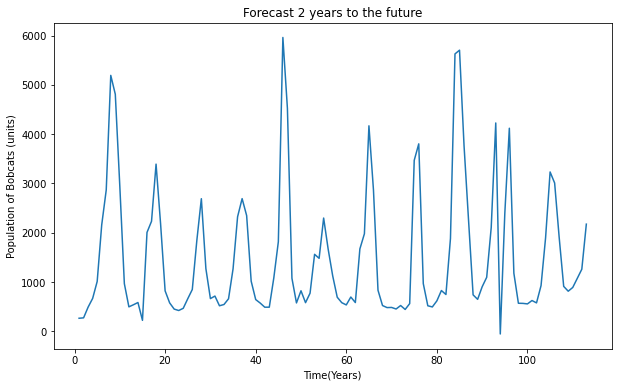

In [87]:
plt.figure(figsize = (10, 6))

plt.plot(np.arange(0,114), result_fina)
plt.plot
plt.xlabel('Time(Years)')
plt.ylabel('Population of Bobcats (units)')
plt.title("Forecast 2 years to the future")
plt.savefig('pred.pdf')
plt.show() 
